#### Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#relation between how much money they are spending on advertisement vs their sales?
df['total_spend'] = df['TV']+df['radio']+df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

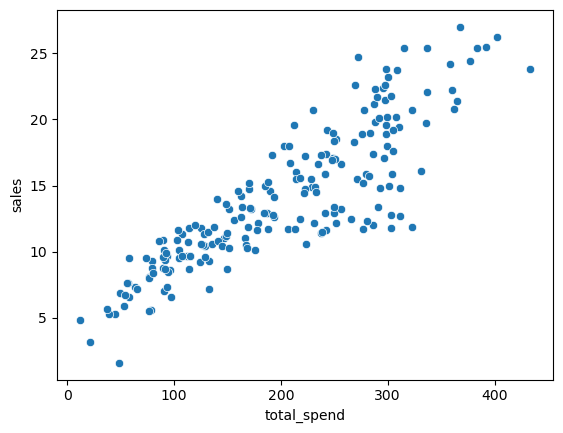

In [6]:
sns.scatterplot(data=df,x='total_spend',y='sales')

<Axes: xlabel='total_spend', ylabel='sales'>

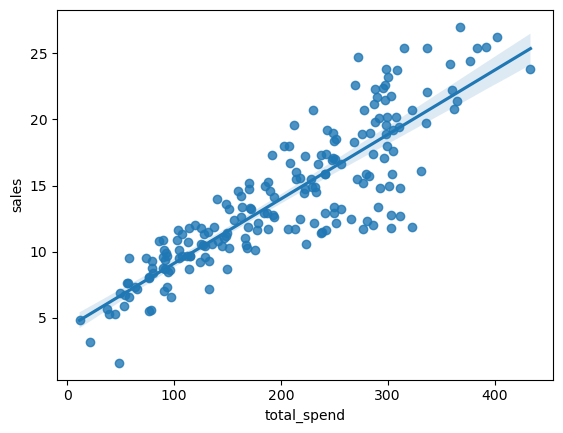

In [7]:
sns.regplot(data=df,x='total_spend',y='sales')  #shows the best fit line for only 1 feature

In [8]:
X = df['total_spend']
y = df['sales']

In [9]:
(B1,B0)=np.polyfit(X,y,deg=1)

In [10]:
print(B1,'  ',B0)

0.04868787931904817    4.243028216036327


In [11]:
potential_spend = np.linspace(0,500,100)   #made up values for testing

In [12]:
#since the equation is y=(B1)X+(B0)
predicted_sales =  B1*potential_spend+B0

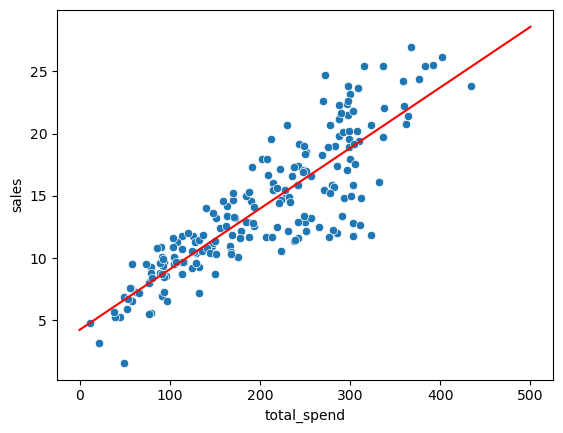

In [13]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

In [14]:
#lets explore the regression for higher degree(polynomial regression)
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [15]:
#The equation is of the form y = (B3)X**3 + (B2)X**2 + (B1)X + B0

In [16]:
pot_spend= np.linspace(0,500,100)

In [17]:
pred_sales =  3.07615033e-07*pot_spend**3-1.89392449e-04*pot_spend**2+8.20886302e-02*pot_spend+2.70495053e+00

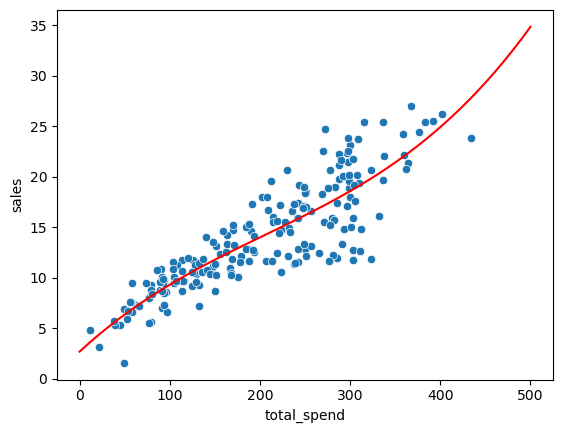

In [18]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(pot_spend,pred_sales,color='red')

#### Using Scikit-Learn

In [19]:
df = pd.read_csv('Advertising.csv')

In [20]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


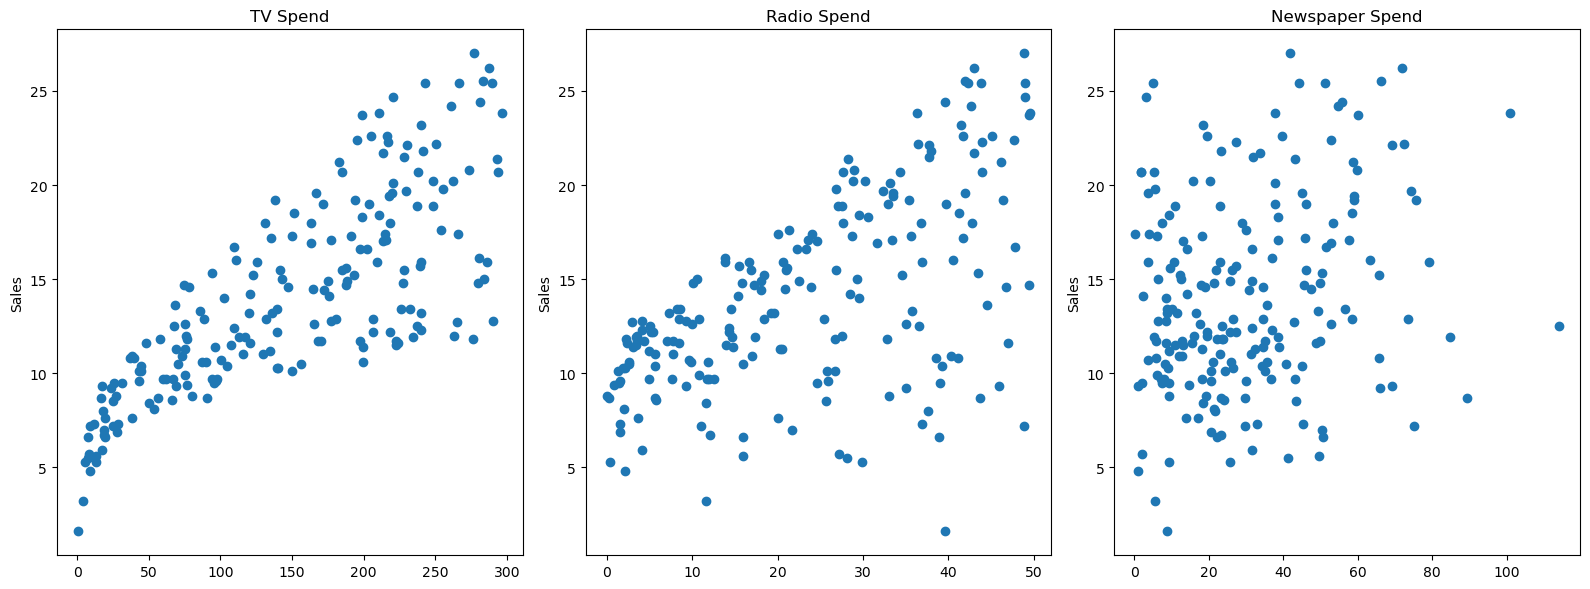

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [22]:
X = df.drop('sales',axis=1)

In [23]:
y = df['sales']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)  #random_state is
#like setting a seed(in random number generation) which will shuffle the data in same way.
#it helps during the performance comparison of various algorithms
#train_test_split shuffles the rows in data frame first for avoiding any inaccuracy due to sorted data

In [26]:
len(X_train)

140

In [27]:
len(X_test)

60

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
#help(LinearRegression)

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train,y_train)   #in-place

LinearRegression()

In [32]:
test_predictions = model.predict(X_test)

In [33]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

##### Evaluating Regression

In [34]:
#There are three evaluation methods which apply to any kind of regression algorithm:
#Mean Absolute Error
#Mean Squared Error
#Root Mean Square Error

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
df['sales'].mean()

14.0225

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sales', ylabel='Count'>

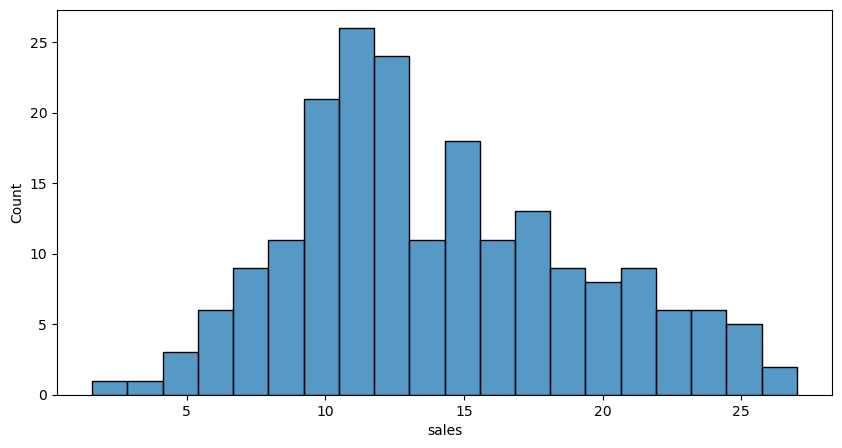

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='sales',bins = 20)

In [38]:
mean_absolute_error(y_test,test_predictions)           #can compare with mean for reference and it 
#seems to be a good prediction as it is nearly 10% of the mean
#***it depends on context***

1.213745773614481

In [39]:
mean_squared_error(y_test,test_predictions)

2.2987166978863787

In [40]:
# RMSE
mean_squared_error(y_test,test_predictions)**0.5

1.5161519375993882

#### Evaluating Residual (y - y^)

In [41]:
test_residuals = y_test - test_predictions

In [42]:
#test_residuals

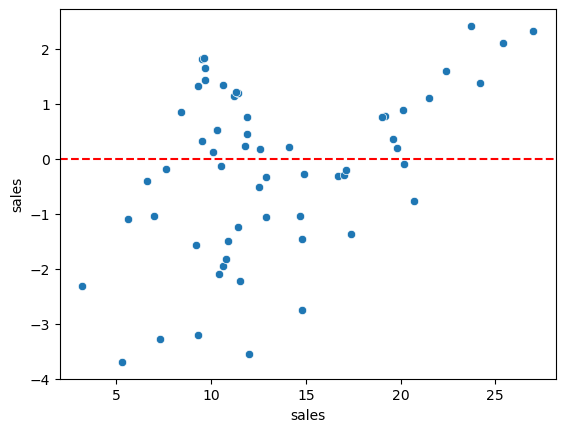

In [43]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')  #Add a horizontal line across the Axes
#the plot should contain random points more or less evenly distributed across the red line 
#if points show some pattern or non evenly distributed then it is a indicator that the linear regression
#model is not suitable for the data

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


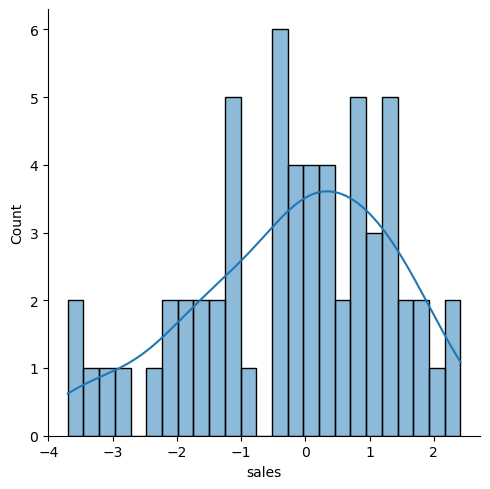

In [44]:
sns.displot(test_residuals,bins=25,kde=True)

#### Saving the Model

In [45]:
final_model = LinearRegression()

In [46]:
final_model.fit(X,y)

LinearRegression()

In [47]:
final_model.coef_  #Beta for tv, radio, newspaper

array([ 0.04576465,  0.18853002, -0.00103749])

In [48]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [49]:
y_hat = final_model.predict(X)

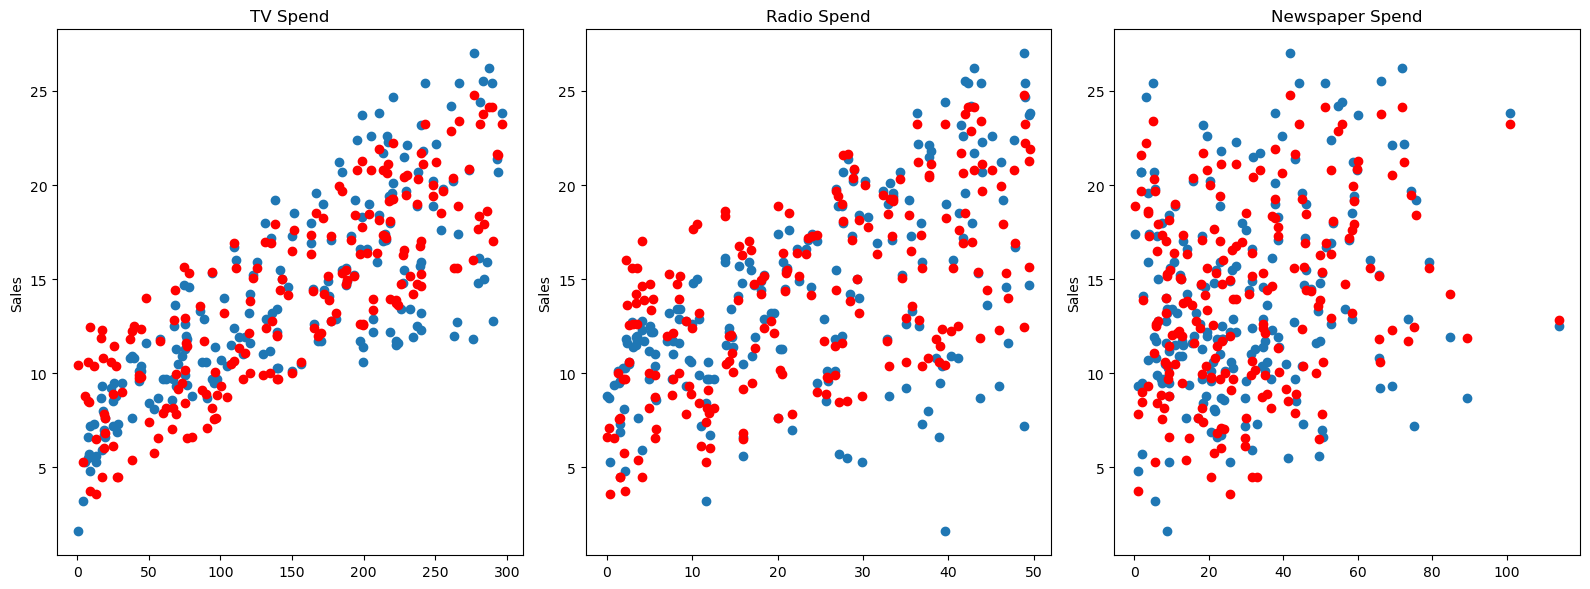

In [50]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

#less useful for more features as we cant visualize beyond 3D

In [51]:
from joblib import dump,load

In [52]:
dump(final_model,'final_sales_model.joblib')   #this will save the model in the PC

['final_sales_model.joblib']

In [53]:
loaded_model = load('final_sales_model.joblib')  #to load the model

In [54]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [55]:
X.shape

(200, 3)

In [56]:
#lets test the model on some new data
campaign = [[149,22,12]]

In [57]:
loaded_model.predict(campaign)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])